In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from random import choice,randint
import time
import psutil

from Stylizer.algorithm import stylizeAbstract,stylizeAdaIN
from Colorizer.algorithm import colorize

In [2]:
CONTENT_DIR = "D:/Images/Content/"
STYLE_DIR = "D:/Images/Style/"

In [3]:
#ADAIN
x,y = [],[]
for cont in os.listdir(CONTENT_DIR):
    for sty in os.listdir(STYLE_DIR):
        Ic = Image.open(CONTENT_DIR + cont)
        #Is = Image.open(STYLE_DIR + sty)
        #alpha = choice([x / 10 for x in range(1, 11)])
        start = time.perf_counter()
        out = stylizeAdaIN(Ic,Is,alpha)
        st = time.perf_counter() - start
        a,b = Ic.size
        c,d = Is.size
        x.append(a*b + c*d)
        y.append(st)
x = np.array(x)
y = np.array(y)

C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


In [19]:
#Abs Style
x,y = [],[]
MODELS = ['cezanne', 'el-greco', 'monet', 'picasso', 'van-gogh']
CONTENT_DIR = "d:/COCO17/val/"
for cont in os.listdir(CONTENT_DIR)[:1000]:
    Ic = Image.open(CONTENT_DIR + cont)
    info = {'model_name':choice(MODELS)}
    start = time.perf_counter()
    try:
        out = stylizeAbstract(Ic,info)
        st = time.perf_counter() - start
        a,b = Ic.size
        x.append(a*b)
        y.append(st)
    except Exception as e:
        print(e,CONTENT_DIR + cont)
    
x = np.array(x)
y = np.array(y)

weight should contain 1 elements not 3 d:/COCO17/val/000000007888.jpg
weight should contain 1 elements not 3 d:/COCO17/val/000000024021.jpg
weight should contain 1 elements not 3 d:/COCO17/val/000000061418.jpg


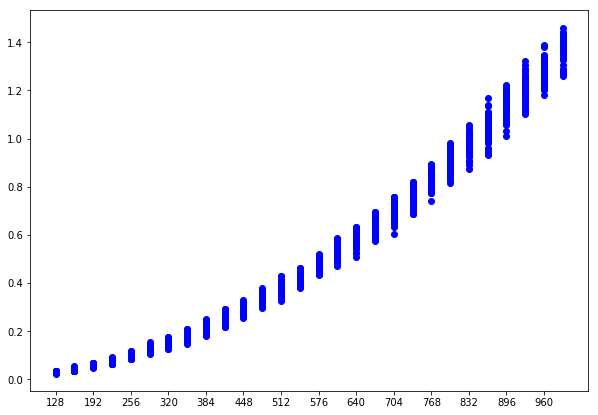

In [38]:
plt.figure(figsize=(10,7))
plt.xticks(range(128,1024,64))
plt.plot(x,y,'bo')
plt.show()

In [33]:
x,y = [],[]
for c in os.listdir(CONTENT_DIR)[:100]:
    for S in range(128,1024,32):
        Im = Image.open(CONTENT_DIR + c).resize((S,S))
        xs,ys = Im.size
        points = []
        for p in range(randint(0,100)):
            pos = (randint(0,xs),randint(0,ys))
            r = randint(0,10)
            col = (randint(0,255),randint(0,255),randint(0,255))
            points.append((pos,col,r))
        start = time.perf_counter()
        try:
            colorize(Im,points)
            st = time.perf_counter() - start
            x.append(S)
            y.append(st)
        except Exception as e:
            print(e,CONTENT_DIR + c)


C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 2 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 4 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 27 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 44 pixels
  warn('Color data out of

C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 53 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 37 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 39 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 29 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 24 pixels
  warn('Color data out

the input array must be have a shape == (.., ..,[ ..,] 3)), got (128, 128) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (160, 160) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (192, 192) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (224, 224) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (256, 256) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (288, 288) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (320, 320) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (352, 352) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., ..,[ ..,] 3)), got (384, 384) d:/COCO17/val/000000007888.jpg
the input array must be have a shape == (.., .

C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 21 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 88 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 62 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 70 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\HP\Anaconda3\envs\spl\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 85 pixels
  warn('Color data out

In [44]:
process = psutil.Process(os.getpid())
process.as_dict().keys()

dict_keys(['cmdline', 'name', 'username', 'open_files', 'connections', 'num_threads', 'ionice', 'threads', 'exe', 'memory_maps', 'cwd', 'memory_percent', 'num_ctx_switches', 'ppid', 'nice', 'pid', 'environ', 'create_time', 'num_handles', 'memory_full_info', 'status', 'cpu_affinity', 'io_counters', 'cpu_percent', 'cpu_times', 'memory_info'])

In [50]:
process.as_dict()['memory_info']

pmem(rss=2084970496, vms=10024513536, num_page_faults=217581753, peak_wset=2299678720, wset=2084970496, peak_paged_pool=27837848, paged_pool=27837640, peak_nonpaged_pool=4930712, nonpaged_pool=2871752, pagefile=10024513536, peak_pagefile=10240151552, private=10024513536)